## PONTO EXTRA # Trabalho #5 - Classificação de Múltiplas Classes

Nesse trabalho você vai desenvolver uma rede neural tipo densa usando a plataforma TensorFlow-Keras para realizar uma tarefa de classificação de múltiplas classes.

A tarefa de classificação desse trabalho consiste na identificação de tipos de vestuários a partir de imagens.

## Coloque aqui o seu nome

Nome: WALLACE DE CASTRO GALVÃO


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [3]:
# Importa bancos de dados do Keras
from tensorflow.keras.datasets import fashion_mnist

# Carrega dados da Fashion-MNIST em tenores
(X_train_orig, Y_train_orig), (xx, yy) = fashion_mnist.load_data()

classes = ['camiseta','calça','pulover','vestido','casaco','sandália','camisa','tênis','bolsa','bota']

print("X_train shape:", X_train_orig.shape, "y_train shape:", Y_train_orig.shape)

X_train shape: (60000, 28, 28) y_train shape: (60000,)


###PARA MELHORAR O RESULTADO DA RNA RESOLVI TREINAR COM 40MIL E 10MIL PARA VALIDAÇÃO E TESTE

In [7]:
# PARA VOCÊ FAZER: Divisão dos dados de treinamento em dados de treinamento e validação

# Gera vetor de indíces (números inteiros) de 0 a 59.999 com ordenamento aletório
ind = np.random.randint(60000, size=60000)

# Dados de entrada
### COMECE AQUI ### (≈ 3 linhas)
X_train = X_train_orig[ind[:40000]]
X_val = X_train_orig[ind[40000:50000]]
X_test = X_train_orig[ind[50000:60000]]
### TERMINE AQUI ###

# Dados de saída
### COMECE AQUI ### (≈ 3 linhas)
Y_train = Y_train_orig[ind[:40000]]
Y_val = Y_train_orig[ind[40000:50000]]
Y_test = Y_train_orig[ind[50000:60000]]
### TERMINE AQUI ###

# Acerta dimensões dos vetores de saída
Y_train = Y_train.reshape((Y_train.shape[0], 1))
Y_val = Y_val.reshape((Y_val.shape[0], 1))
Y_test = Y_test.reshape((Y_test.shape[0], 1))

print("Dimensão do tensor de dados de entrada de treinamento =", X_train.shape)
print("Dimensão do tensor de dados de entrada de validação =", X_val.shape)
print("Dimensão do tensor de dados de entrada de test =", X_test.shape) # tinha faltado esta linha
print("Dimensão do tensor de dados de saída de treinamento =", Y_train.shape)
print("Dimensão do tensor de dados de saída de validação =", Y_val.shape)
print("Dimensão do tensor de dados de saída de test =", Y_test.shape)

Dimensão do tensor de dados de entrada de treinamento = (40000, 28, 28)
Dimensão do tensor de dados de entrada de validação = (10000, 28, 28)
Dimensão do tensor de dados de entrada de test = (10000, 28, 28)
Dimensão do tensor de dados de saída de treinamento = (40000, 1)
Dimensão do tensor de dados de saída de validação = (10000, 1)
Dimensão do tensor de dados de saída de test = (10000, 1)


In [8]:
# PARA VOCÊ FAZER: Normalização dos dados de entrada

# Guarda dimensão das imagens
num_px = X_train.shape[1]
print("Numero de colunas e linhas das imagens de entrada=", num_px)

# Transformação dos dados em números reais
### Comece AQUI ### (≈ 3 linhas)
X_train_float = X_train.astype('float32') / 255
X_val_float = X_val.astype('float32') / 255
X_test_float = X_test.astype('float32') / 255
### TERMINE AQUI ###

# Redimensionamento dos dados de entrada
### COMECE AQUI ### (≈ 6 linhas)
m_train = X_train_float.shape[0]
X_train_flat = X_train_float.reshape(m_train, num_px * num_px)

m_val = X_val_float.shape[0]
X_val_flat = X_val_float.reshape(m_val, num_px * num_px)

m_test = X_test_float.shape[0]
X_test_flat = X_test_float.reshape(m_test, num_px * num_px)
### TERMINE AQUI ###

# Dimensão dos tensores de dados
print('Dimensão dos dados de entrada do conjunto de treinamento: ', X_train_flat.shape)
print('Dimensão dos dados de entrada do conjunto de validação: ', X_test_flat.shape)
print('Dimensão dos dados de entrada do conjunto de teste: ', X_test_flat.shape)

# Para verificar se os resultados estão corretos
print("Alguns elementos da primeira imagem de treinamento = ", X_train_flat[14,10:15])
print("Alguns elementos da primeira imagem de validação = ", X_val_flat[14,10:15])
print("Alguns elementos da primeira imagem de teste = ", X_test_flat[14,10:15])

Numero de colunas e linhas das imagens de entrada= 28
Dimensão dos dados de entrada do conjunto de treinamento:  (40000, 784)
Dimensão dos dados de entrada do conjunto de validação:  (10000, 784)
Dimensão dos dados de entrada do conjunto de teste:  (10000, 784)
Alguns elementos da primeira imagem de treinamento =  [0.         0.11372549 0.13333334 0.         0.        ]
Alguns elementos da primeira imagem de validação =  [0.         0.1254902  0.28235295 0.         0.        ]
Alguns elementos da primeira imagem de teste =  [0.         0.08627451 0.3137255  0.34901962 0.3372549 ]


In [9]:
# PARA VOCÊ FAZER: Coficação das classes dos exemplos 

# Importa classe de utilidades do Keras
from tensorflow.keras.utils import to_categorical

# Transformação das classes de números reais para vetores
### COMECE AQUI ### (≈ 3 linhas)
Y_train_hot = to_categorical(Y_train, num_classes=10)
Y_val_hot = to_categorical(Y_val, num_classes=10)
Y_test_hot = to_categorical(Y_test, num_classes=10)
### Termine AQUI ###

# Dimensão dos dados
print('Dimensão dos dados de saída do conjunto de treinamento: ', Y_train_hot.shape)
print('Dimensão dos dados de saída do conjunto de validação: ', Y_val_hot.shape)
print('Dimensão dos dados de saída do conjunto de teste: ', Y_test_hot.shape)

# Para verificar se os resultados estão corretos
print(' ')
print("Primeiras 5 classes numéricas dos exemplos de treinamento = ", Y_train[:5].T)
print("Primeiras 5 saídas dos exemplos de treinamento = ", Y_train_hot[:5,:])
print(' ')
print("Primeiras 5 classes numéricas dos exemplos de validação = ", Y_val[:5].T)
print("Primeiras 5 saídas dos exemplos de validação = ", Y_val_hot[:5,:])
print(' ')
print("Primeiras 5 classes numéricas dos exemplos de teste = ", Y_test[:5].T)
print("Primeiras 5 saídas dos exemplos de teste = ", Y_test_hot[:5,:])

Dimensão dos dados de saída do conjunto de treinamento:  (40000, 10)
Dimensão dos dados de saída do conjunto de validação:  (10000, 10)
Dimensão dos dados de saída do conjunto de teste:  (10000, 10)
 
Primeiras 5 classes numéricas dos exemplos de treinamento =  [[4 5 5 4 2]]
Primeiras 5 saídas dos exemplos de treinamento =  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
 
Primeiras 5 classes numéricas dos exemplos de validação =  [[6 2 6 9 4]]
Primeiras 5 saídas dos exemplos de validação =  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
 
Primeiras 5 classes numéricas dos exemplos de teste =  [[6 5 8 2 3]]
Primeiras 5 saídas dos exemplos de teste =  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 

## 3 - Criação e treinamento da RNA CONVOLUCIONAL

In [11]:
from tensorflow.keras import models, layers, regularizers

def build_cnn_model(input_shape, lamb):
    model = models.Sequential()
    
    # Primeira camada convolucional
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, 
                            kernel_regularizer=regularizers.l2(lamb)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    # Segunda camada convolucional
    model.add(layers.Conv2D(64, (3, 3), activation='relu', 
                            kernel_regularizer=regularizers.l2(lamb)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    # Terceira camada convolucional
    model.add(layers.Conv2D(128, (3, 3), activation='relu', 
                            kernel_regularizer=regularizers.l2(lamb)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    # Camada Flatten para transformar as saídas convolucionais em um vetor
    model.add(layers.Flatten())
    
    # Camada densa intermediária
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(lamb)))
    model.add(layers.Dropout(0.5))
    
    # Camada de saída com Softmax para classificação
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

# Uso do modelo com as dimensões da entrada da Fashion-MNIST (28x28x1 para imagens em tons de cinza)
input_shape = (28, 28, 1)
lamb = 0.0002
cnn_model = build_cnn_model(input_shape, lamb)
cnn_model.summary()

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,370 (435.04 KB)

 Trainable params: 110,922 (433.29 KB)

 Non-trainable params: 448 (1.75 KB)

### Exercício #5: Compilação e treinamento da RNA CONVOLUCIONAL

In [12]:
from tensorflow.keras import optimizers, callbacks

# Compilação do modelo CNN
learning_rate = 0.001
adam = optimizers.Adam(learning_rate=learning_rate)

cnn_model.compile(optimizer=adam, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

# Definindo o EarlyStopping para evitar overfitting
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Treinamento da rede neural
history = cnn_model.fit(X_train, Y_train_hot, 
                        epochs=30, 
                        batch_size=64, 
                        validation_data=(X_val, Y_val_hot), 
                        callbacks=[early_stopping],
                        verbose=1)

Epoch 1/30


2024-09-04 19:02:47.520714: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.6228 - loss: 1.1945 - val_accuracy: 0.8357 - val_loss: 0.4938
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.8072 - loss: 0.5946 - val_accuracy: 0.8584 - val_loss: 0.4348
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.8319 - loss: 0.5200 - val_accuracy: 0.8725 - val_loss: 0.4020
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.8453 - loss: 0.4812 - val_accuracy: 0.8611 - val_loss: 0.4363
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.8556 - loss: 0.4583 - val_accuracy: 0.8853 - val_loss: 0.3687
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.8659 - loss: 0.4376 - val_accuracy: 0.8865 - val_loss: 0.3660
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.8669 - loss: 0.4319 - val_accuracy: 0.8812 - val_loss: 0.3892
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.8700 - loss: 0.4243 - val_accurac

### Visualização dos resultados

Execute a célula a seguir para fazer os gráficos da função de custo e da métrica para os dados de treinamento e validação.

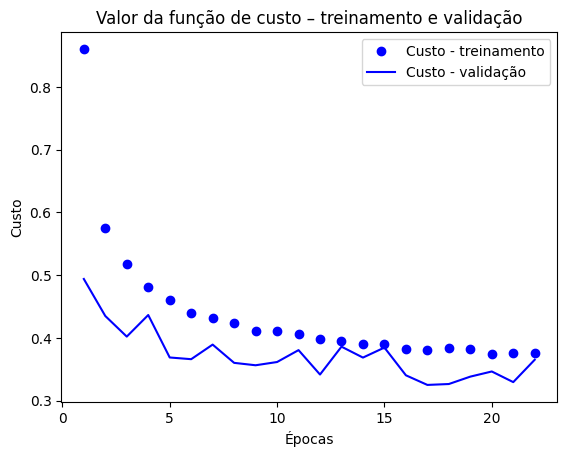

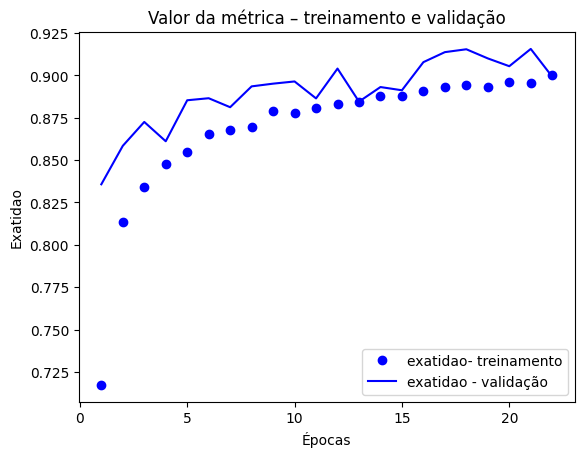

In [13]:
# Salva treinamento na variável history para visualização
history_dict = history.history

# Salva custos, métricas e epocas em vetores 
custo = history_dict['loss']
acc = history_dict['accuracy']
val_custo = history_dict['val_loss']
val_acc = history_dict['val_accuracy']

# Cria vetor de épocas
epocas = range(1, len(custo) + 1)

# Gráfico dos valores de custo
plt.plot(epocas, custo, 'bo', label='Custo - treinamento')
plt.plot(epocas, val_custo, 'b', label='Custo - validação')
plt.title('Valor da função de custo – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()
plt.show()

# Gráfico dos valores da métrica
plt.plot(epocas, acc, 'bo', label='exatidao- treinamento')
plt.plot(epocas, val_acc, 'b', label='exatidao - validação')
plt.title('Valor da métrica – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Exatidao')
plt.legend()
plt.show()

### Exercício #6: Cálculo do custo e métrica

Modifique a célula abaixo para calcular o custo e a exatidão para os dados de treinamento, validação e teste.

In [16]:
# PARA VOCÊ FAZER: cálculo do custo e a exatidão para os dados de treinamento, validação e teste

# Usando o método evaluate calcule o custo e a exatidão
### COMECE AQUI ### (≈ 3 linhas)
custo_e_metricas_train = cnn_model.evaluate(X_train, Y_train_hot, verbose=0)
custo_e_metricas_val = cnn_model.evaluate(X_val, Y_val_hot, verbose=0)
custo_e_metricas_test = cnn_model.evaluate(X_test, Y_test_hot, verbose=0)
### TERMINE AQUI ###

# Exibindo os resultados
print('Dados de treinamento: ', custo_e_metricas_train)
print('Dados de validação: ', custo_e_metricas_val)
print('Dados de teste: ', custo_e_metricas_test)

Dados de treinamento:  [0.2742265462875366, 0.9311249852180481]
Dados de validação:  [0.32495251297950745, 0.9136999845504761]
Dados de teste:  [0.3369022607803345, 0.9081000089645386]


  1/313 ━━━━━━━━━━━━━━━━━━━━ 26s 86ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Previsto como camisa


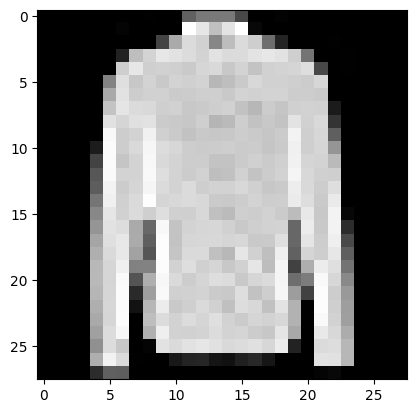

In [18]:
# PARA VOCÊ FAZER: cálculo das classes previstas pela RNA no conjunto de testes

# Calculo das previsões da RNA
### COMECE AQUI ### (≈ 1 linha)
Y_prev = cnn_model.predict(X_test)
### TERMINE AQUI ###

# Cálculo das classes previstas
### COMECE AQUI ### (≈ 1 linha)
classe = np.argmax(Y_prev, axis=1)
### TERMINE AQUI ###

# Exemplo de uma imagem dos dados de teste
index = 0
plt.imshow(X_test[index], cmap='gray')
print(f"Previsto como {classes[classe[index]]}")

### Exercício #8: Visualização dos resultados

Na célula abaixo crie um código para fazer um gráfico com as classes reais e as previstas pela sua RNA para todos os 150 primeiros exemplos do connjunto de teste.

Dimensão vetor classes reais=  (10000, 1)
Dimensão vetor classes previstas=  (10000,)


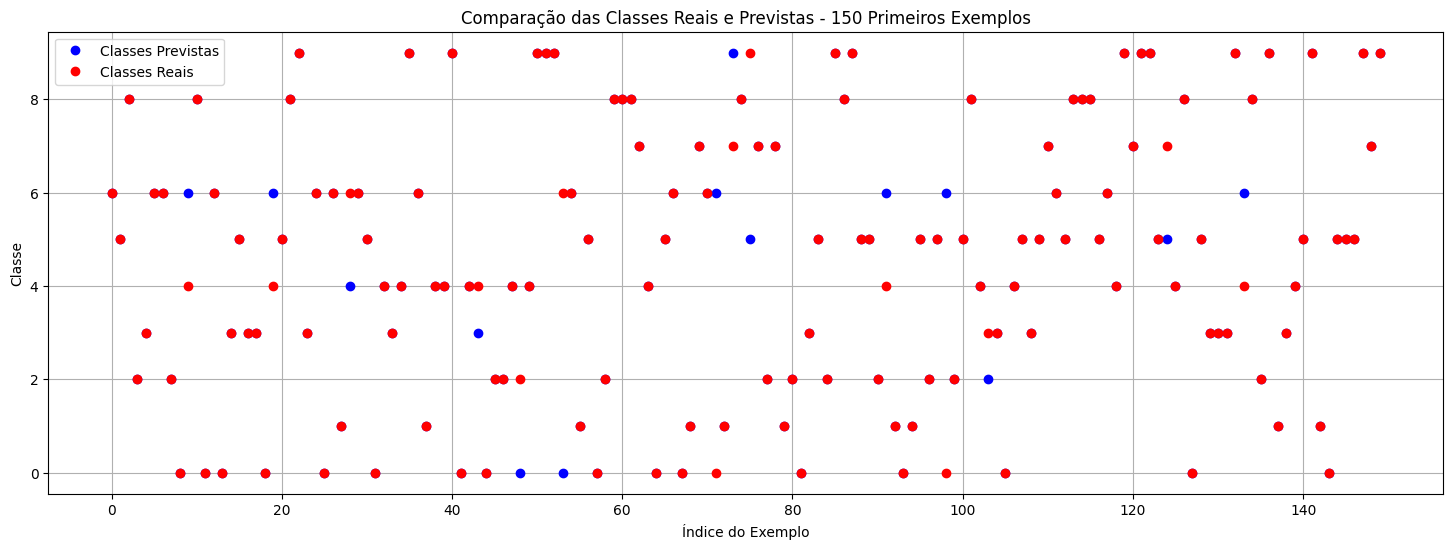

In [19]:
# PARA VOCÊ FAZER: cálculo das classes previstas pela RNA

# Resultado gráfico
# Verifique dimensoes dos vetores de classes reais e previstas
print('Dimensão vetor classes reais= ', Y_test.shape)
print('Dimensão vetor classes previstas= ', classe.shape)

# Fazer o gráfico das classes reais e previstas
plt.figure(figsize=(18, 6))
### COMECE AQUI ### (≈ 7 linhas)
# Plotando as classes previstas
plt.plot(range(150), classe[:150], 'bo', label='Classes Previstas', markersize=6)
# Plotando as classes reais
plt.plot(range(150), Y_test[:150].flatten(), 'ro', label='Classes Reais', markersize=6)
# Configurações do gráfico
plt.title('Comparação das Classes Reais e Previstas - 150 Primeiros Exemplos')
plt.xlabel('Índice do Exemplo')
plt.ylabel('Classe')
plt.legend()
plt.grid(True)
plt.show()
### TERMINE AQUI ###


### Ponto extra

**Será que é possível melhorar os resultados?** 

Faça uma cópia deste notebook com as alterações que desejar para melhorar a rede. Altere, por exemplo: número de camadas e de neurônios, funções de ativação, método de otimização, método de regularização...

Testarei a rede treinada em um outro conjunto de dados. O melhor resultado da sala ganha uma caixa de chocolate na última aula.

**Código para Salvar o Modelo:**

In [20]:
# Salva o modelo CNN treinado no formato HDF5 (.h5)
cnn_model.save('cnn_model_fashion_mnist.h5')
print("Modelo salvo com sucesso como 'cnn_model_fashion_mnist.h5'")

Modelo salvo com sucesso como 'cnn_model_fashion_mnist.h5'


**Código para Carregar o Modelo Salvo:**

In [21]:
from tensorflow.keras.models import load_model

# Carrega o modelo salvo
loaded_model = load_model('cnn_model_fashion_mnist.h5')
print("Modelo carregado com sucesso.")

# Avaliação do modelo carregado para garantir que foi salvo corretamente
test_loss, test_accuracy = loaded_model.evaluate(X_test, Y_test_hot)
print(f"Loss no Teste: {test_loss:.4f}, Acurácia no Teste: {test_accuracy:.4f}")

Modelo carregado com sucesso.
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9123 - loss: 0.3261
Loss no Teste: 0.3369, Acurácia no Teste: 0.9081
